### `themachinethatgoesping` tutorial series
# Tutorial 1: Opening a file

In this tutorial, we use `themachinethatgoesping` to access the data from a single file. 

This short sequence illustrates a few core objects of the `themachinethatgoesping`, and how to use them to load and access data.

`themachinethatgoesping` concepts covered:
- finding .all/.wcd files
- data loading
- "File Handler" object


## Summary

In [1]:
# First you have to import themachinethatgoesping
# here we import it as 'Ping', note the capital P
import themachinethatgoesping as Ping
from themachinethatgoesping.echosounders import index_functions

#set the data folders where data files can be found (../../unittest data holds a couple of very small test files)
data_folders = []
data_folders.append("../../unittest_data")

# To find all find all Kongsberg files in the list of data_folders
kongsberg_files = index_functions.find_files(data_folders, [".all","wcd"])

# To find all find all simrad raw files in the list of data_folders
simrad_files = index_functions.find_files(data_folders, [".raw"])

# load the data with the appropriate file handler:
fh_kongsberg = Ping.echosounders.kongsbergall.KongsbergAllFileHandler(kongsberg_files, init=True)
fh_simrad = Ping.echosounders.simradraw.SimradRawFileHandler(simrad_files, init=True)

#access the tenth datagram
package = fh_simrad.datagram_interface.datagrams()[10]
package.print()

Found 16 files
Found 11 files
indexing files ⠐ 100% :00s<00m:00s] [..7506659992808476.all (1/16)]                               
indexing files ⠠ 100% :00s<00m:00s] [..2155654265012286.wcd (16/16)]                                
indexing files ⢀ 100% :00s<00m:00s] [Found: 1168 datagrams in 16 files (21MB)]                                          
Initializing datagramdata interface ⠈ 0% :00s<00m:00s]           
Initializing ping interface ⢀ 87% :00s<00m:00s] [Done]                                              
indexing files ⠐ 100% :00s<00m:00s] [..7763601822576513.raw (1/11)]                               
indexing files ⠠ 100% :00s<00m:00s] [..3321685858862757.raw (11/11)]                                
indexing files ⢀ 100% :00s<00m:00s] [Found: 994 datagrams in 11 files (41MB)]                                         
Initializing ping interface ⡀ 96% :00s<00m:00s] [Done]                                                      
EK80 XML0 datagram
##################
- length:       

In [ ]:
pings = Ping.pingprocessing.filter_pings(fh_kongsberg, ['watercolumn.amplitude'])

## Step-by-step

### 0. Basic setup and imports

In [2]:
# First you have to import themachinethatgoesping
# here we import it as 'Ping', note the capital P
import themachinethatgoesping as Ping

#set the data folders where data files can be found (../../unittest data holds a couple of very small test files)
data_folders = []
data_folders.append("../../unittest_data")


In [5]:
Ping.echosounders.index_functions.find_files("../../unittest_data", ['.all', '.wcd'])

Found 16 files


['../../unittest_data/kongsberg/simon/7287506659992808476.all',
 '../../unittest_data/kongsberg/simon/7287506659992808476.wcd',
 '../../unittest_data/kongsberg/a/y/-1333931979274893952.wcd',
 '../../unittest_data/kongsberg/a/y/-1333931979274893952.all',
 '../../unittest_data/kongsberg/a/f/ALL/6516408039690331208.all',
 '../../unittest_data/kongsberg/a/f/WCD/6516408039690331208.wcd',
 '../../unittest_data/kongsberg/a/c/519880139284219668.wcd',
 '../../unittest_data/kongsberg/a/c/519880139284219668.all',
 '../../unittest_data/kongsberg/g/-7041029013895133878.wcd',
 '../../unittest_data/kongsberg/g/-7041029013895133878.all',
 '../../unittest_data/kongsberg/turbeams/6641182978793103390.wcd',
 '../../unittest_data/kongsberg/turbeams/9142459809945665151.wcd',
 '../../unittest_data/kongsberg/turbeams/9142459809945665151.all',
 '../../unittest_data/kongsberg/turbeams/6641182978793103390.all',
 '../../unittest_data/kongsberg/he/-3092155654265012286.all',
 '../../unittest_data/kongsberg/he/-3092

### 1. List raw data files (kongsberg .all/.wcd files)

In [2]:
# To use ping we need a list of .all/.wcd or .raw files (pathes)
# Ping provides functions to find these files in a list of folders
# The function is hidden in the namespace Ping.echosounders.index_functions
# here we import this namespace it as index_functions
from themachinethatgoesping.echosounders import index_functions

# To find all find all Kongsberg files in the list of data_folders
kongsberg_files = index_functions.find_files(data_folders, [".all","wcd"])

# To find all find all simrad raw files in the list of data_folders
simrad_files = index_functions.find_files(data_folders, [".raw"])

Found 16 files
Found 11 files


In [13]:
# show files found
print(f"The output is a {type(kongsberg_files)} object with {len(kongsberg_files)} elements:")
kongsberg_files.sort()
for i, file in enumerate(kongsberg_files):
    print(f"({i}/{len(kongsberg_files)}) {file}")

The output is a <class 'list'> object with 16 elements:
(0/16) ../../unittest_data/kongsberg/a/c/519880139284219668.all
(1/16) ../../unittest_data/kongsberg/a/c/519880139284219668.wcd
(2/16) ../../unittest_data/kongsberg/a/f/ALL/6516408039690331208.all
(3/16) ../../unittest_data/kongsberg/a/f/WCD/6516408039690331208.wcd
(4/16) ../../unittest_data/kongsberg/a/y/-1333931979274893952.all
(5/16) ../../unittest_data/kongsberg/a/y/-1333931979274893952.wcd
(6/16) ../../unittest_data/kongsberg/g/-7041029013895133878.all
(7/16) ../../unittest_data/kongsberg/g/-7041029013895133878.wcd
(8/16) ../../unittest_data/kongsberg/he/-3092155654265012286.all
(9/16) ../../unittest_data/kongsberg/he/-3092155654265012286.wcd
(10/16) ../../unittest_data/kongsberg/simon/7287506659992808476.all
(11/16) ../../unittest_data/kongsberg/simon/7287506659992808476.wcd
(12/16) ../../unittest_data/kongsberg/turbeams/6641182978793103390.all
(13/16) ../../unittest_data/kongsberg/turbeams/6641182978793103390.wcd
(14/16) ..

### 2. Load files' data

In [7]:

fh_kongsberg = Ping.echosounders.kongsbergall.KongsbergAllFileHandler(kongsberg_files[:])
print(fh_kongsberg)

indexing files ⠐ 100% :00s<00m:00s] [..7506659992808476.all (1/16)]                               
indexing files ⠠ 100% :00s<00m:00s] [..2155654265012286.wcd (16/16)]                                
indexing files ⢀ 100% :00s<00m:00s] [Found: 1168 datagrams in 16 files (21MB)]                                          
Initializing datagramdata interface ⠈ 0% :00s<00m:00s]           
Initializing ping interface ⢀ 87% :00s<00m:00s] [Done]                                              
KongsbergAllFileHandler
#######################
-
File infos 
-------------               
- Number of loaded .all files: : 8        
- Number of loaded .wcd files: : 8        
- Total file size: :             21.56 MB 

 Detected datagrams 
^^^^^^^^^^^^^^^^^^^^ 
- timestamp_first:  21/08/2012 17:09:42.36 
- timestamp_last:   21/04/2023 17:48:18.29 
- Total:            1168                   
- Datagrams [0x30]: 4                      [PUIDOutput]
- Datagrams [0x31]: 18                     [PUStatusOutput]


In [9]:

fh_simrad = Ping.echosounders.simradraw.SimradRawFileHandler(simrad_files[:])
print(fh_simrad)

indexing files ⠐ 100% :00s<00m:00s] [..7763601822576513.raw (1/11)]                               
indexing files ⠠ 100% :00s<00m:00s] [..3321685858862757.raw (11/11)]                                
indexing files ⢀ 100% :00s<00m:00s] [Found: 994 datagrams in 11 files (41MB)]                                         
Initializing ping interface ⡀ 96% :00s<00m:00s] [Done]                                                      
SimradRawFileHandler
####################
-
File infos 
-------------               
- Number of loaded .raw files: : 11       
- Total file size: :             41.56 MB 

 Detected datagrams 
^^^^^^^^^^^^^^^^^^^^ 
- timestamp_first:  13/05/2015 09:13:41.19 
- timestamp_last:   21/04/2023 18:03:00.17 
- Total:            994                    
- Datagrams [NME0]: 601                    [NMEA text datagram]
- Datagrams [XML0]: 168                    [XML0 text datagram]
- Datagrams [MRU0]: 55                     [Motion binary datagram]
- Datagrams [FIL1]: 54       

In [11]:
# load the data with the appropriate file handler:

fh_kongsberg = Ping.echosounders.kongsbergall.KongsbergAllFileHandler(kongsberg_files[0:2])
fh_simrad = Ping.echosounders.simradraw.SimradRawFileHandler(simrad_files[0])
print("\n")

# the output is a "File Handler" object. 
print(f"A File Handler is a {type(fh_kongsberg)} object.\n")

# a File Handler manages the entire dataset.

# print a summary of the File Handler's contents
#print(fh_kongsberg)
print(fh_simrad)

# notes:
#   - it is initalized with the list of files
#   - the cache file paths are optional but recommended
#   - File pairs will be grouped together at this stage

indexing files ⠐ 100% :00s<00m:00s] [..7506659992808476.all (1/2)]                              
indexing files ⠠ 100% :00s<00m:00s] [..7506659992808476.wcd (2/2)]                              
indexing files ⢀ 100% :00s<00m:00s] [Found: 60 datagrams in 2 files (0MB)]                                      
Initializing datagramdata interface ⠈ 0% :00s<00m:00s]           
Initializing ping interface ⠐ 0% :00s<00m:00s] [Done]                                              
indexing file ⠐ 100% :00s<00m:00s]           
indexing file ⠠ 100% :00s<00m:00s] [Found: 116 datagrams]                      
Initializing ping interface ⡀ 85% :00s<00m:00s] [Done]                                                      


A File Handler is a <class 'themachinethatgoesping.echosounders_cppy.kongsbergall.KongsbergAllFileHandler'> object.

SimradRawFileHandler
####################
-
File infos 
-------------                                      
- File path:         ...st_data/simrad/y/2917763601822576513.raw 

In [13]:
fh_kongsberg.datagram_interface.datagrams('WatercolumnDatagram')[0].print()

WatercolumnDatagram
###################
- bytes:               49850    
- stx:                 0x02     
- datagram_identifier: 0x6b     [WatercolumnDatagram]
- model_number:        EM2040   
- date:                20160413 [YYYYMMDD]
- time_since_midnight: 67234126 [ms]

 date/time 
-----------   
- timestamp: 1460572834.13 [s]
- date:      13/04/2016    [MM/DD/YYYY]
- time:      18:40:34.126  [HH:MM:SS]

 datagram content 
------------------    
- ping_counter:                5371       
- system_serial_number:        213        
- number_of_datagrams:         1          
- datagram_number:             1          
- number_of_transmit_sectors:  3          
- total_no_of_receive_beams:   256        
- number_of_beams_in_datagram: 256        
- sound_speed:                 14880      [0.1 m/s]
- sampling_frequency:          382966     [0.01 Hz]
- tx_time_heave:               -13        [cm]
- tvg_function_applied:        30         
- tvg_offset_in_db:            20         
- scannin

### 3. Accessing data

In [12]:
fh_kongsberg.datagram_interface.datagrams().print()

DatagramContainer
#################
-
Time info (Datagrams) 
------------------------ 
- Start time: 30/07/2022 20:47:43.51 
- End time:   30/07/2022 20:47:44.62 
- Sorted:     no                     

 Contained datagrams 
---------------------       
- Total:                                       156 
- Datagrams [AttitudeDatagram]:                1   [41]
- Datagrams [ClockDatagram]:                   1   [43]
- Datagrams [InstallationParametersStart]:     2   [49]
- Datagrams [RawRangeAndAngle]:                12  [4e]
- Datagrams [PositionDatagram]:                2   [50]
- Datagrams [RuntimeParameters]:               3   [52]
- Datagrams [SoundSpeedProfileDatagram]:       2   [55]
- Datagrams [XYZDatagram]:                     12  [58]
- Datagrams [SeabedImageData]:                 12  [59]
- Datagrams [WatercolumnDatagram]:             105 [6b]
- Datagrams [NetworkAttitudeVelocityDatagram]: 4   [6e]


In [14]:
package = fh_kongsberg.datagram_interface.datagrams('WatercolumnDatagram')[0]
package.print()

WatercolumnDatagram
###################
- bytes:               49850    
- stx:                 0x02     
- datagram_identifier: 0x6b     [WatercolumnDatagram]
- model_number:        EM2040   
- date:                20160413 [YYYYMMDD]
- time_since_midnight: 67234126 [ms]

 date/time 
-----------   
- timestamp: 1460572834.13 [s]
- date:      13/04/2016    [MM/DD/YYYY]
- time:      18:40:34.126  [HH:MM:SS]

 datagram content 
------------------    
- ping_counter:                5371       
- system_serial_number:        213        
- number_of_datagrams:         1          
- datagram_number:             1          
- number_of_transmit_sectors:  3          
- total_no_of_receive_beams:   256        
- number_of_beams_in_datagram: 256        
- sound_speed:                 14880      [0.1 m/s]
- sampling_frequency:          382966     [0.01 Hz]
- tx_time_heave:               -13        [cm]
- tvg_function_applied:        30         
- tvg_offset_in_db:            20         
- scannin

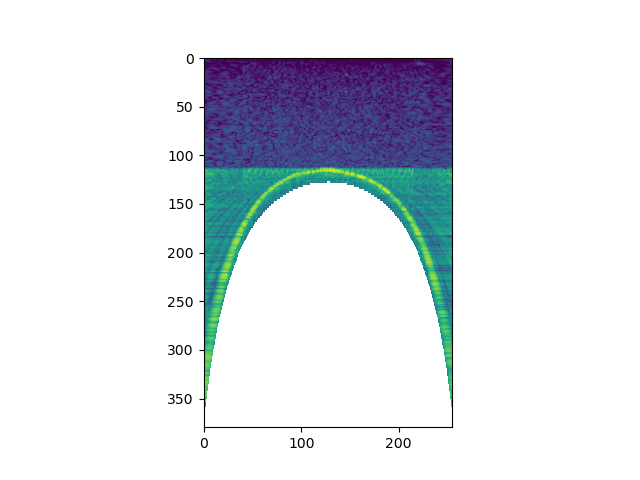

In [21]:
image = fh_kongsberg.get_pings()[0].watercolumn.get_amplitudes()
%matplotlib widget
from matplotlib import pyplot as plt
plt.close()
plt.imshow(image.transpose())

In [23]:
Ping.pingprocessing.widgets.WCIViewer(fh_kongsberg.get_pings())

In [25]:
package.get_sound_speed()

15092

In [26]:
package.get_sound_speed_m_s()

1509.2000732421875

In [29]:
from tqdm.auto import tqdm

for package in tqdm(fh_kongsberg.datagram_interface.datagrams('PositionDatagram')):
    print(package.get_latitude_in_degrees())

  0%|          | 0/2 [00:00<?, ?it/s]

57.0742968
57.0743016
